# upsetPlotForQCTesting.ipynb
## Marcus Viscardi,    May 05, 2022

In general, I have been tentative to use something like a VennDiagram to spit out the portions of libraries that have passed steps (ie. tail calling, read assignment, etc.). This is because the output information would be a little meh(?) and hard to compare between multiple runs. Today I realized that I really need to do this for tail calling (figure out the portion passing/failing) and it would be really powerful if I could have a nice way to do this across replicates.

UpSet plots are exactly what I need! [(Docs link)](https://upsetplot.readthedocs.io/en/stable/ "Documentation Link")

Plan here is to quickly trial what this would look like. And then figure out if I want to do this further!


In [1]:
import seaborn as sea
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import upsetplot

import numpy as np
import pandas as pd
from tqdm import tqdm
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)

from nanoporePipelineCommon import *

print('imports done.')
matplotlib._version

imports done.


<module 'matplotlib._version' from '/usr/local/lib/python3.8/dist-packages/matplotlib/_version.py'>

In [22]:
libs_to_test = ["xrn-1-5tera-smg-6", 'xrn-1-5tera']

libs_dict = pick_libs_return_paths_dict(libs_to_test, return_all=True)
print("Libs to be loaded:")
print(list(libs_dict.keys()))
df_dict = {}
for lib, lib_path in libs_dict.items():
    df_dict[lib] = pd.read_parquet(lib_path)
test_lib_df = df_dict[lib]
print('done.')

Looking for file for riboD, at /data16/marcus/working/210706_NanoporeRun_riboD-and-yeastCarrier_0639_L3/output_dir/merge_files/*_mergedOnReads.parquet... File Found.
Looking for file for totalRNA1, at /data16/marcus/working/210709_NanoporeRun_totalRNA_0639_L3/output_dir/merge_files/*_mergedOnReads.parquet... File Found.
Looking for file for totalRNA2, at /data16/marcus/working/210720_nanoporeRun_totalRNA_0639_L3_replicate/output_dir/merge_files/*_mergedOnReads.parquet... File Found.
Looking for file for polyA1, at /data16/marcus/working/210528_NanoporeRun_0639_L3s/output_dir/merge_files/*_mergedOnReads.parquet... File Found.
Looking for file for polyA2, at /data16/marcus/working/210719_nanoporeRun_polyA_0639_L3_replicate/output_dir/merge_files/*_mergedOnReads.parquet... File Found.
Looking for file for xrn-1, at /data16/marcus/working/210905_nanoporeRun_totalRNA_5108_xrn-1-KD/output_dir/merge_files/*_mergedOnReads.parquet... File Found.
Looking for file for xrn-1-5tera, at /data16/marc

riboD
totalRNA1
totalRNA2
polyA1
polyA2
xrn-1
xrn-1-5tera
pTRI-stds
xrn-1-5tera-smg-6
pTRI-stds-tera3
polyA3
totalRNA3
roach_L3_1
roach_L3_2
roach_L4_1
roach_L4_2


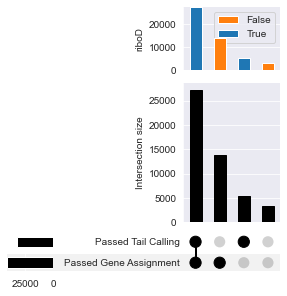

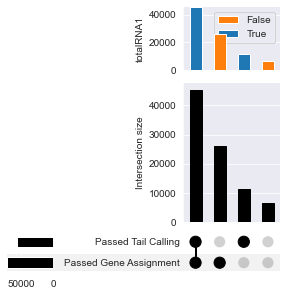

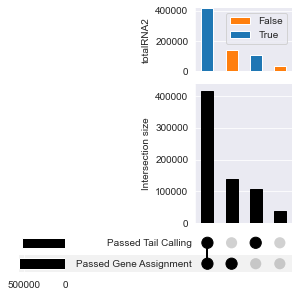

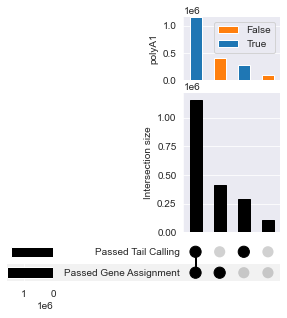

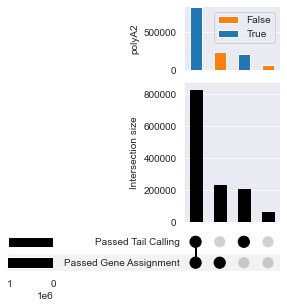

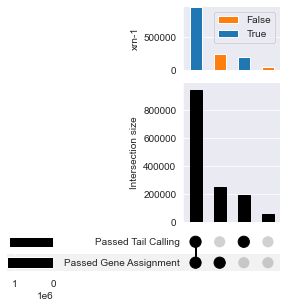

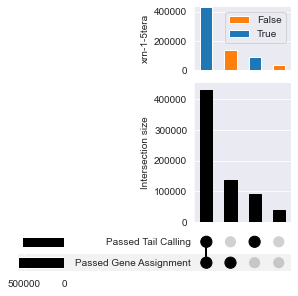

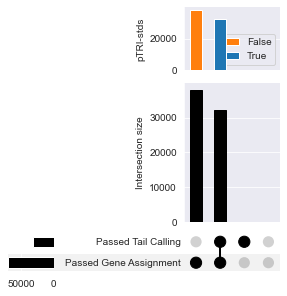

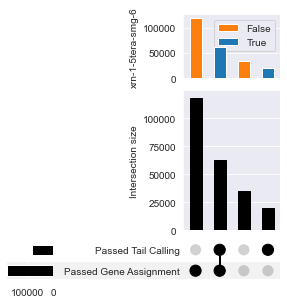

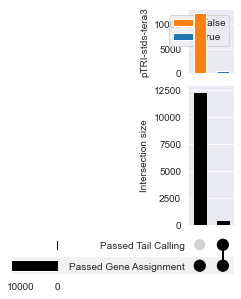

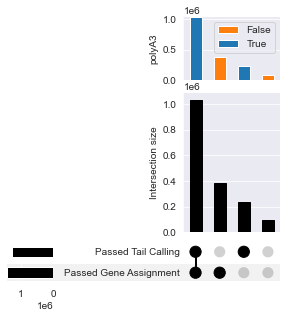

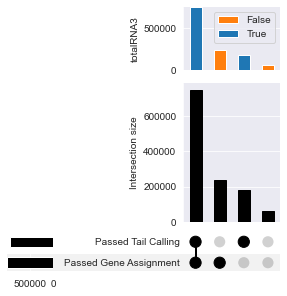

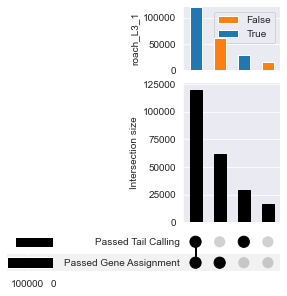

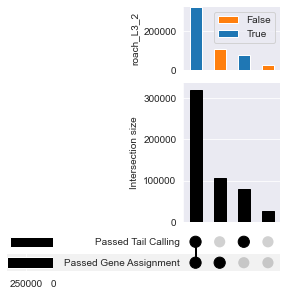

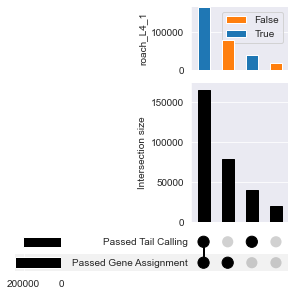

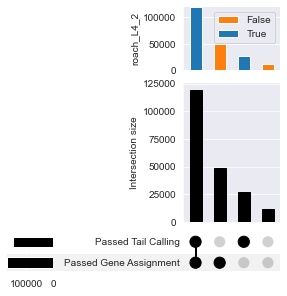

In [46]:
def convert_mergedOnReads_to_upset(mergedOnReads_df: pd.DataFrame) -> pd.DataFrame:
    upset_plot_df = pd.DataFrame(mergedOnReads_df.qc_tag_polya == 'PASS')
    upset_plot_df['qc_tag_featc'] = mergedOnReads_df.qc_tag_featc == "Assigned"
    upset_plot_df.rename(columns={'qc_tag_polya': 'Passed Tail Calling',
                                  'qc_tag_featc': 'Passed Gene Assignment'}, inplace=True)
    upset_format_data = upsetplot.from_indicators(lambda df: df.select_dtypes(bool), data=upset_plot_df)
    return upset_format_data

def df_to_plot(lib, lib_df):
    upset_format_data = convert_mergedOnReads_to_upset(lib_df)
    upset_df_dict[lib] = upset_format_data
    fig = plt.figure()
    upset = upsetplot.UpSet(upset_format_data, sort_by='cardinality')
    # upset.add_stacked_bars('Passed Tail Calling', title=lib)
    upset.plot(fig=fig)
    fig.savefig(f"220505_{lib}_upset.svg")

upset_df_dict = {}
for lib, lib_df in list(df_dict.items()):
    print(lib)
    df_to_plot(lib, lib_df)

In [42]:
fig = plt.figure()
upset_format_data = convert_mergedOnReads_to_upset(lib_df)
upset_df_dict[lib] = upset_format_data
fig = plt.figure()
upset = upsetplot.UpSet(upset_format_data, sort_by='cardinality')
# for k, subplot in upset.make_grid().items():
#     fig.add_subplot(subplot)
fig
upset.make_grid()

{'matrix': GridSpec(8, 11)[6:8, 7:11],
 'shading': GridSpec(8, 11)[6:8, 0:11],
 'totals': GridSpec(8, 11)[6:8, 0:2],
 'gs': GridSpec(8, 11),
 'intersections': GridSpec(8, 11)[0:6, 7:11]}

<Figure size 432x288 with 0 Axes>

<Figure size 352x256 with 0 Axes>